# Telco Customer Churn Prediction
Using **XGBoost** for classification

You can manually download the dataset from [here](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("./data/Telco_customer_churn.csv")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

All of these five columns (`Churn Label`, `Churn Value`, `Churn Score`, `CLTV`, `Churn Reason`) contain the information that we want to predict. We can remove all of them, except `Churn Value` that we want to use it as `Known Labels`

In [5]:
df[["Churn Label", "Churn Value", "Churn Score", "CLTV", "Churn Reason"]]

,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,Yes,1,86,3239,Competitor made better offer
1,Yes,1,67,2701,Moved
2,Yes,1,86,5372,Moved
3,Yes,1,84,5003,Moved
4,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...
7038,No,0,45,5306,NaN
7039,No,0,59,2140,NaN
7040,No,0,71,5560,NaN
7041,No,0,59,2793,NaN


In [6]:
df.drop(
    ["Churn Label", "Churn Score", "CLTV", "Churn Reason"],
    axis="columns",
    inplace=True,
)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


We can remove the columns that only contain a single value, they will not useful for classification

In [7]:
for column in df.columns:
    if df[column].nunique() == 1:
        print(column)

Count
Country
State


In [8]:
df["Count"].unique()

array([1])

In [9]:
df["Country"].unique()

array(['United States'], dtype=object)

In [10]:
df["State"].unique()

array(['California'], dtype=object)

We can also remove `CustomerID` because it is useless for classification

We can also remove `Lat Long` because there are separate columns for `Latitude` and `Longitude`


In [11]:
df["City"].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

But `City` is useful, we don't remove this column.

In [12]:
df.drop(
    ["CustomerID", "Count", "Country", "State", "Lat Long"],
    axis="columns",
    inplace=True,
)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   object 
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

Althogh **whitespaces** are OK for xgboost, but for plotting the trees, we need to replace them with **underscore**. in `City` column and in column names.

In [14]:
df["City"].replace(" ", "_", regex=True, inplace=True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [15]:
df.columns = df.columns.str.replace(" ", "_")
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


## Identifying Missing Data

In [16]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip_Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior_Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure_Months      7043 non-null   int64  
 9   Phone_Service      7043 non-null   object 
 10  Multiple_Lines     7043 non-null   object 
 11  Internet_Service   7043 non-null   object 
 12  Online_Security    7043 non-null   object 
 13  Online_Backup      7043 non-null   object 
 14  Device_Protection  7043 non-null   object 
 15  Tech_Support       7043 non-null   object 
 16  Streaming_TV       7043 

The six numeric columns look good.

In [18]:
df.describe()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Churn_Value
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370
std,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561
min,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000
25%,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000
50%,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000
75%,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000
max,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000


Check the unique values in 'object' columns:

In [19]:
print("All 'object' columns and their unique values")
i = 0
for col_name, d_type in zip(df.dtypes.index, df.dtypes.values):
    if d_type == "object":
        i += 1
        print(f"#{i} {col_name}:")
        print(df[col_name].unique())
        print("--------")

All 'object' columns and their unique values
#1 City:
['Los_Angeles' 'Beverly_Hills' 'Huntington_Park' ... 'Standish' 'Tulelake'
 'Olympic_Valley']
--------
#2 Gender:
['Male' 'Female']
--------
#3 Senior_Citizen:
['No' 'Yes']
--------
#4 Partner:
['No' 'Yes']
--------
#5 Dependents:
['No' 'Yes']
--------
#6 Phone_Service:
['Yes' 'No']
--------
#7 Multiple_Lines:
['No' 'Yes' 'No phone service']
--------
#8 Internet_Service:
['DSL' 'Fiber optic' 'No']
--------
#9 Online_Security:
['Yes' 'No' 'No internet service']
--------
#10 Online_Backup:
['Yes' 'No' 'No internet service']
--------
#11 Device_Protection:
['No' 'Yes' 'No internet service']
--------
#12 Tech_Support:
['No' 'Yes' 'No internet service']
--------
#13 Streaming_TV:
['No' 'Yes' 'No internet service']
--------
#14 Streaming_Movies:
['No' 'Yes' 'No internet service']
--------
#15 Contract:
['Month-to-month' 'Two year' 'One year']
--------
#16 Paperless_Billing:
['Yes' 'No']
--------
#17 Payment_Method:
['Mailed check' 'Electr

`Total_Charges` column has numeric values but represented as string! We need to convert it.

In [20]:
# pd.to_numeric(df["Total_Charges"])

## ValueError: Unable to parse string " " at position 2234

But it raises an error. becaues all null values in this column are filled by empty string and `pd.to_numeric()` function cannot convert them to zero. So first we have to replace them with zeros, then try to use `pd.to_numeric()` function.

In [20]:
len(df.loc[df["Total_Charges"] == " "])

11

In [21]:
df.loc[df["Total_Charges"] == " "]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


All 11 people with `Total_Charges == " "` have just signed up, because `Tenure_Months` is `0`.

We can remove these 11 people or set `Total_Charge` to `0`.

In [22]:
df.loc[df["Total_Charges"] == " ", "Total_Charges"] = 0
df.loc[df["Tenure_Months"] == 0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


We can see that all columns with `Tenure_Month` = 0, now have `Total_Charges` = 0.

Now we can convert this column to numeric values.

In [23]:
df["Total_Charges"] = pd.to_numeric(df["Total_Charges"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip_Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior_Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure_Months      7043 non-null   int64  
 9   Phone_Service      7043 non-null   object 
 10  Multiple_Lines     7043 non-null   object 
 11  Internet_Service   7043 non-null   object 
 12  Online_Security    7043 non-null   object 
 13  Online_Backup      7043 non-null   object 
 14  Device_Protection  7043 non-null   object 
 15  Tech_Support       7043 non-null   object 
 16  Streaming_TV       7043 

For drawing a picture of one of the **XGBoost** trees, we need to replace all whitespaces in the dataset with underscores.

In [24]:
df.replace(" ", "_", regex=True, inplace=True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


## Split the Date into Dependent and Independent Variables

In [25]:
X = df.drop("Churn_Value", axis="columns").copy()
y = df["Churn_Value"].copy()

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (7043, 23)
y shape: (7043,)


## One-Hot Encoding

We can use these two popular method for one-hot encoding:
- `ColumnTransformer()` from scikit-learn

- `get_dummies()` from pandas

In [26]:
categorical_columns = []
print("All 'object' columns and their unique values")
i = 0
for col_name, d_type in zip(X.dtypes.index, X.dtypes.values):
    if d_type == "object":
        i += 1
        print(f"#{i} {col_name}:")
        print(df[col_name].unique())
        print("--------")
        categorical_columns.append(col_name)

All 'object' columns and their unique values
#1 City:
['Los_Angeles' 'Beverly_Hills' 'Huntington_Park' ... 'Standish' 'Tulelake'
 'Olympic_Valley']
--------
#2 Gender:
['Male' 'Female']
--------
#3 Senior_Citizen:
['No' 'Yes']
--------
#4 Partner:
['No' 'Yes']
--------
#5 Dependents:
['No' 'Yes']
--------
#6 Phone_Service:
['Yes' 'No']
--------
#7 Multiple_Lines:
['No' 'Yes' 'No_phone_service']
--------
#8 Internet_Service:
['DSL' 'Fiber_optic' 'No']
--------
#9 Online_Security:
['Yes' 'No' 'No_internet_service']
--------
#10 Online_Backup:
['Yes' 'No' 'No_internet_service']
--------
#11 Device_Protection:
['No' 'Yes' 'No_internet_service']
--------
#12 Tech_Support:
['No' 'Yes' 'No_internet_service']
--------
#13 Streaming_TV:
['No' 'Yes' 'No_internet_service']
--------
#14 Streaming_Movies:
['No' 'Yes' 'No_internet_service']
--------
#15 Contract:
['Month-to-month' 'Two_year' 'One_year']
--------
#16 Paperless_Billing:
['Yes' 'No']
--------
#17 Payment_Method:
['Mailed_check' 'Electr

In [27]:
categorical_columns

['City',
 'Gender',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Contract',
 'Paperless_Billing',
 'Payment_Method']

In [28]:
X_encoded = pd.get_dummies(X, columns=categorical_columns, dtype=int)
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


Check that `y` only contains `1` and `0`

In [29]:
y.unique()

array([1, 0])

## Split the data into training and testing dataset

In [30]:
sum(y) / len(y)

0.2653698707936959

27% of people in the dateset left the company!

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.25,
    random_state=42,
    stratify=y,
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test  shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test  shape: {y_test.shape}")

X_train shape: (5282, 1178)
X_test  shape: (1761, 1178)
y_train shape: (5282,)
y_test  shape: (1761,)


Verify that using `stratify` works as expected

In [32]:
sum(y_train) / len(y_train)

0.2654297614539947

In [33]:
sum(y_test) / len(y_test)

0.26519023282226006

## Building the `XGBoost` Model

In [34]:
clf_xgb = XGBClassifier(
    objective="binary:logistic",
    seed=42,
    early_stopping_rounds=10,
    eval_metric="aucpr",
)

clf_xgb.fit(
    X_train,
    y_train,
    verbose=True,
    eval_set=[(X_test, y_test)],
)

[0]	validation_0-aucpr:0.64135
[1]	validation_0-aucpr:0.65171
[2]	validation_0-aucpr:0.65991
[3]	validation_0-aucpr:0.65350
[4]	validation_0-aucpr:0.65743
[5]	validation_0-aucpr:0.65051
[6]	validation_0-aucpr:0.65827
[7]	validation_0-aucpr:0.65980
[8]	validation_0-aucpr:0.65751
[9]	validation_0-aucpr:0.65389
[10]	validation_0-aucpr:0.65572
[11]	validation_0-aucpr:0.65920
[12]	validation_0-aucpr:0.66010
[13]	validation_0-aucpr:0.65963
[14]	validation_0-aucpr:0.65877
[15]	validation_0-aucpr:0.65791
[16]	validation_0-aucpr:0.65808
[17]	validation_0-aucpr:0.65742
[18]	validation_0-aucpr:0.65770
[19]	validation_0-aucpr:0.65698
[20]	validation_0-aucpr:0.65733
[21]	validation_0-aucpr:0.65646


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
y_pred = clf_xgb.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.65      0.53      0.59       467

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.73      1761
weighted avg       0.79      0.80      0.79      1761



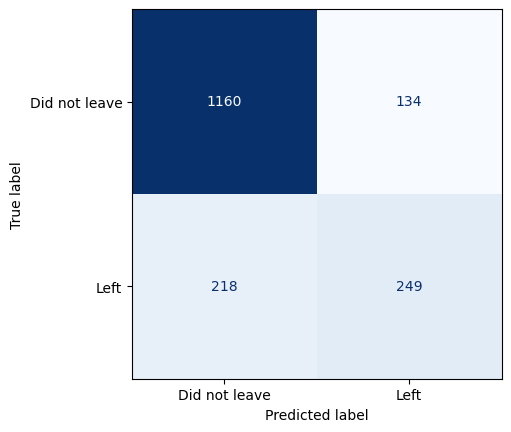

In [36]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    colorbar=False,
    cmap="Blues",
    display_labels=["Did not leave", "Left"],
);

## Optimize Parameters using Cross Validation and `GridSearchCV()`

**Note:** When data are imbalanced, if you care only about the overall performance metric (AUC) of the prediction
- Balance the positive and negative weights via `scale_pos_weight`
- Use `AUC` for evaluation

In [37]:
## Round 1
param_grid_round_1 = {
    "max_depth": [3, 4, 5],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1.0],
    "reg_lambda": [0, 1.0, 10.0],
    "scale_pos_weight": [1, 3, 5], # recommended: sum(nagative instances) / sum(positive instances)
}
## Output: max_depth: 4, learning_rate: 0.1, gamma: 0.25, reg_lambda: 10, scale_pos_weight: 3
## Because learning_rate and reg_lambda were at the ends of their range, we continue to explore more

## Round 2
param_grid_round_2 = {
    "max_depth": [4],
    "learning_rate": [0.1, 0.5, 1.0],
    "gamma": [0.25],
    "reg_lambda": [10.0, 20.0, 100.0],
    "scale_pos_weight": [3],
}
## Output: max_depth: 4, learning_rate: 0.1, gamma: 0.25, reg_lambda: 10, scale_pos_weight: 3
## Nothing is changed

In [39]:
## Note: To speed up cross validation, and to further prevent overfitting.
## we are only using aa random subset of the date (90%) and are only
## using a random subset of the features (columns) (50%) per tree.

# optimal_params = GridSearchCV(
#     estimator=XGBClassifier(
#         objective="binary:logistic",
#         seed=42,
#         early_stopping_rounds=10,
#         eval_metric="auc",
#         subsample=0.9,
#         colsample_bytree=0.5,
#     ),
#     param_grid=param_grid_round_1,
#     scoring="roc_auc",
#     verbose=2,
#     n_jobs=-1,
#     cv=3,
# )

# optimal_params.fit(
#     X_train,
#     y_train,
#     verbose=True,
#     eval_set=[(X_test, y_test)],
# )
# print(optimal_params.best_params_)

## Building, Evaluating, Drawing, and Interpreting the Optimized XGBoost Model

In [38]:
clf_xgb_best = XGBClassifier(
    objective="binary:logistic",
    seed=42,
    early_stopping_rounds=10,
    eval_metric="aucpr",
    colsample_bytree=0.5,
    subsample=0.9,
    max_depth=4,
    learning_rate=0.1,
    gamma=0.25,
    reg_lambda=10,
    scale_pos_weight=3,
)

clf_xgb_best.fit(
    X_train,
    y_train,
    verbose=True,
    eval_set=[(X_test, y_test)],
)

[0]	validation_0-aucpr:0.60336
[1]	validation_0-aucpr:0.60564
[2]	validation_0-aucpr:0.61176
[3]	validation_0-aucpr:0.61444
[4]	validation_0-aucpr:0.61908
[5]	validation_0-aucpr:0.62317
[6]	validation_0-aucpr:0.63000
[7]	validation_0-aucpr:0.63065
[8]	validation_0-aucpr:0.63175
[9]	validation_0-aucpr:0.63286
[10]	validation_0-aucpr:0.63663
[11]	validation_0-aucpr:0.63628
[12]	validation_0-aucpr:0.63787
[13]	validation_0-aucpr:0.65530
[14]	validation_0-aucpr:0.64728
[15]	validation_0-aucpr:0.65728
[16]	validation_0-aucpr:0.65563
[17]	validation_0-aucpr:0.65500
[18]	validation_0-aucpr:0.65305
[19]	validation_0-aucpr:0.65254
[20]	validation_0-aucpr:0.64991
[21]	validation_0-aucpr:0.65190
[22]	validation_0-aucpr:0.65740
[23]	validation_0-aucpr:0.65262
[24]	validation_0-aucpr:0.65598
[25]	validation_0-aucpr:0.65609
[26]	validation_0-aucpr:0.65616
[27]	validation_0-aucpr:0.65761
[28]	validation_0-aucpr:0.65766
[29]	validation_0-aucpr:0.65830
[30]	validation_0-aucpr:0.65858
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred_best = clf_xgb_best.predict(X_test)
report_best = classification_report(y_test, y_pred_best)
print(report_best)

              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1294
           1       0.53      0.83      0.64       467

    accuracy                           0.76      1761
   macro avg       0.72      0.78      0.73      1761
weighted avg       0.82      0.76      0.77      1761



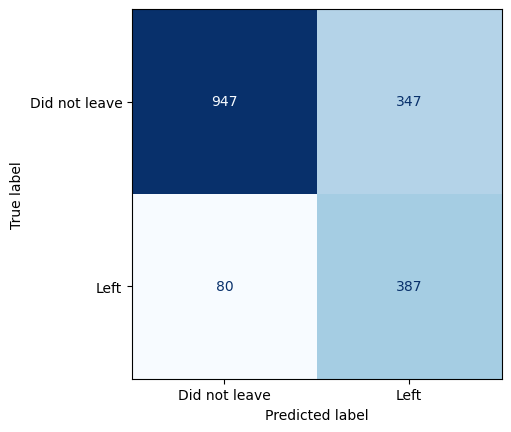

In [40]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_best,
    colorbar=False,
    cmap="Blues",
    display_labels=["Did not leave", "Left"],
);

## Comparing the first and optimized models

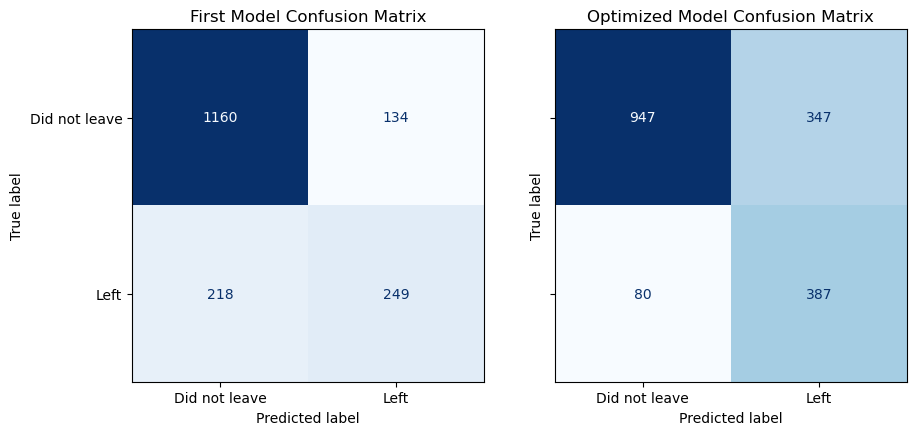

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    colorbar=False,
    cmap="Blues",
    display_labels=["Did not leave", "Left"],
    ax=axes[0],
)
axes[0].set_title('First Model Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_best,
    colorbar=False,
    cmap="Blues",
    display_labels=["Did not leave", "Left"],
    ax=axes[1]
)
axes[1].set_title('Optimized Model Confusion Matrix');

Optimized model is a lot better at identifying people that left the company. Of **467** people that left the company, **387 (82%)**, were correctly identified. Before optimization, we only correctly identified **249 (53%)**. (We are comparing **recall** metrics)

However, this improvement wat at the expense of not being able to correctly classify as many people that did not leave.